<img src="images/disney.jpg" width="300"/>

# דיסני פלוס 
מספר קבוצה - 39 
### שמות המגישים:
### אפרת יתיר, מריה סבלין ואריאל קנדלי

קישור: https://www.kaggle.com/datasets/unanimad/disney-plus-shows

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
url = "https://raw.githubusercontent.com/EfratYatir/final-project/main/disney_plus_shows.csv"
Disney = pd.read_csv(url)

## הקדמה
##### דיסני פלוס היא חברת בת של ענקית הסרטים וולט דיסני והיא מספקת שירותי צפייה בסרטים ובסדרות לקהל העולמי.
##### החברה הוקמה בנובמבר 2019 ובקיץ 2022 יגיעו שירותיה לישראל.

##  נסקור את ההבדלים בין דעות הצופים לדעות המבקרים:
#### metascore - אתר לדירוג סרטים ע"י מבקרי קולנוע
#### imdb - אתר לדירוג סרטים ע"י הקהל הרחב

In [37]:
rating_diff = Disney[['title', 'metascore', 'imdb_rating']]

##### בדיקה שאין ציון 0

In [38]:
rating_diff_zero = rating_diff.loc[(rating_diff.metascore == 0) | (rating_diff.imdb_rating == 0)]
rating_diff_zero

,title,metascore,imdb_rating


##### מילוי ערכים חסרים ב - 0

In [39]:
Disney.fillna(0 , inplace = True)

In [40]:
rating_diff = rating_diff.loc[(rating_diff.metascore > 0) & (rating_diff.imdb_rating > 0)]
rating_diff.fillna(0 , inplace = True)
rating_diff['difference'] = abs(rating_diff['metascore'] - rating_diff['imdb_rating']*10)
rating_diff[['metascore','imdb_rating', 'difference']]

,metascore,imdb_rating,difference
0,70.0,7.3,3.0
2,49.0,5.7,8.0
4,35.0,4.9,14.0
6,83.0,7.2,11.0
7,77.0,7.2,5.0
...,...,...,...
962,83.0,7.7,6.0
967,47.0,7.3,26.0
970,74.0,7.2,2.0
978,72.0,7.7,5.0


<AxesSubplot:ylabel='difference'>

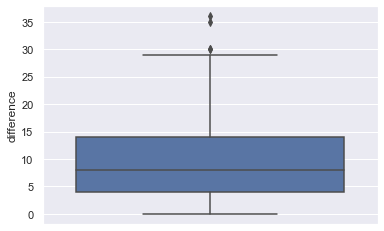

In [41]:
sns.boxplot(data = rating_diff ,y = 'difference')

## ניתן להסיק מן הגרף כי ציוני המבקרים וציוני הצופים לרוב קרובים

## נערוך השוואה בין הז'אנרים השונים לפי ציוני הקהל ולפי כמות הסרטים בדיסני פלוס (ללא התייחסות לציוני המבקרים):

In [54]:
movies = Disney.loc[(Disney.type == 'movie')]
genre = movies.genre.str.split(', ', expand = True)
genre.loc[:, 'imdb_rating'] = movies[['imdb_rating']]
genre.fillna(0 , inplace = True)
genre_rating = pd.melt(genre, id_vars=['imdb_rating'], value_vars=[0,1,2,3,4,5,6,7])
genre_rating = genre_rating.rename(columns={'value':'genre'})
genre_rating = genre_rating.loc[(genre_rating.imdb_rating != 0) & (genre_rating.genre != 0)]

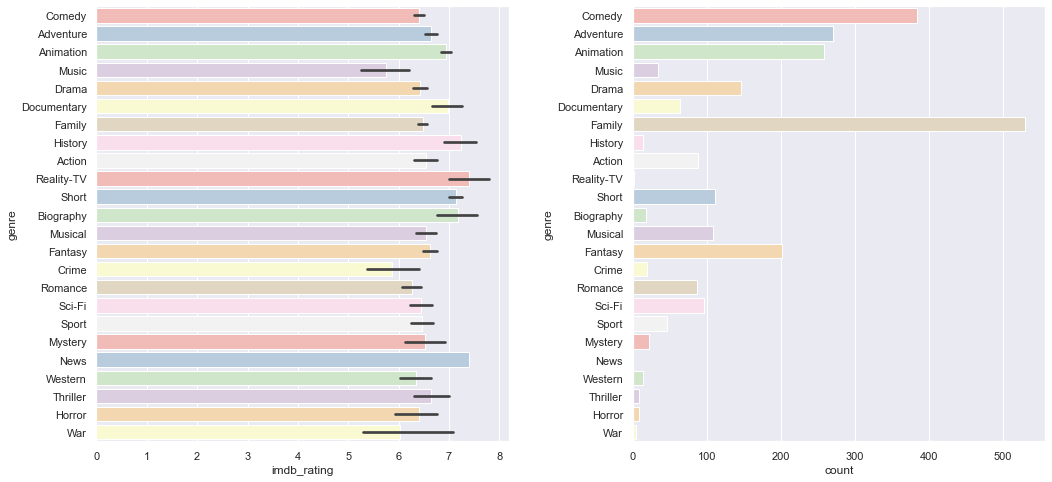

In [43]:
fig, axes = plt.subplots(figsize=(17, 8), ncols=2)
plt.subplots_adjust(wspace = 0.3)
sns.barplot(ax=axes[0], data = genre_rating, x='imdb_rating', y='genre', palette="Pastel1")
sns.countplot(ax=axes[1], data = genre_rating, y = 'genre', palette="Pastel1")
plt.show()

## מהשוואה בין הגרפים ניתן להסיק כי הז'אנר האהוב ביותר הוא לא בהכרח הנפוץ בדיסני פלוס ומכאן אפשר לגלות אילו סוגי סרטים כדאי להוסיף על מנת לרצות את קהל הצופים ולהגדיל את מספר המנויים.
 

## :בדיקת כדאיות של 6 הבמאים בעלי מרבית הסרטים בדיסני פלוס (החל משנת 1990)

In [57]:
Disney['year'] = pd.DatetimeIndex(Disney['released_at']).year
director = movies.director.str.split(', ', expand = True)
director.loc[:, 'imdb_rating'] = movies[['imdb_rating']]
director.loc[:, 'metascore'] = movies[['metascore']]
director.loc[:, 'year'] = movies[['year']]
director.fillna(0 , inplace = True)

##### מציאת 6 הבמאים בעלי כמות הסרטים הגבוהה ביותר

In [58]:
director_rating = pd.melt(director, id_vars=['imdb_rating', 'metascore', 'year'], value_vars=[0,1,2,3,4,5,6,7,8,9,10,11])
director_rating = director_rating.rename(columns={'value':'director'})
director_rating = director_rating.loc[(director_rating.imdb_rating != 0) & (director_rating.metascore != 0) & (director_rating.director != 0) & (director_rating.year > 1990)]
director_rating['imdb_rating'] = director_rating['imdb_rating']*10
director_rating['director'].value_counts().head(6)

John Musker            5
John Lasseter          5
Ron Clements           5
Jon Turteltaub         4
Andrew Stanton         4
Alastair Fothergill    4
Name: director, dtype: int64

In [59]:
director_top6 = director_rating.loc[(director_rating.director == 'John Musker') | (director_rating.director == 'Ron Clements') | (director_rating.director == 'John Lasseter') | (director_rating.director == 'Jon Turteltaub') | (director_rating.director == 'Alastair Fothergill') | (director_rating.director == 'Andrew Stanton')]

##### ממוצע ציוני הצופים

In [60]:
director_rating[['imdb_rating']].mean()

imdb_rating    67.82971
dtype: float64

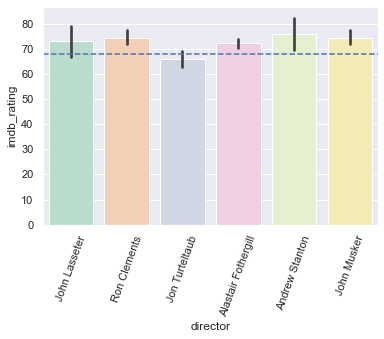

In [61]:
sns.barplot(data = director_top6, x='director', y='imdb_rating', palette="Pastel2")
plt.xticks(rotation=70)
plt.axhline(67.82971, ls = '--')
plt.show()

### לפי ציוני הצופים, סרטיו של הבמאי ג'ון טרטלטאוב נמצאים מתחת לרמה הממוצעת 

##### ממוצע ציוני המבקרים

In [62]:
director_rating[['metascore']].mean()

metascore    62.905797
dtype: float64

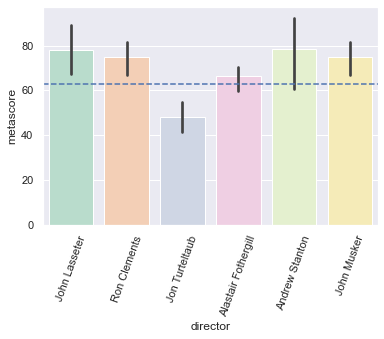

In [63]:
sns.barplot(data = director_top6, x='director', y='metascore', palette="Pastel2")
plt.xticks(rotation=70)
plt.axhline(62.905797101449274, ls = '--')
plt.show()

### כמו כן, סרטיו של הבמאי ג'ון טרטלטאוב נמצאים מתחת לרמה הממוצעת גם לפי ציוני המבקרים 

## מכך ניתן להסיק כי הוספת סרטים נוספים של במאי זה אינה בהכרח תגדיל את כמות המנויים.

## שחקן אהוב:

In [64]:
actor = movies.actors.str.split(', ', expand = True)
actor.loc[:, 'imdb_rating'] = movies[['imdb_rating']]
actor.fillna(0 , inplace = True)
actor_rating = pd.melt(actor, id_vars=['imdb_rating'], value_vars=[0,1,2,3])
actor_rating  = actor_rating.rename(columns={'value':'actor'})
actor_rating = actor_rating.loc[(actor_rating.imdb_rating != 0) & (actor_rating.actor != 0)]

##### מציאת 6 השחקנים בעלי כמות הסרטים הגבוהה ביותר

In [65]:
actor_rating['actor'].value_counts().head(6)

Clarence Nash      31
Pinto Colvig       23
Jim Cummings       17
Walt Disney        15
James MacDonald    13
Tim Allen          11
Name: actor, dtype: int64

In [66]:
actor_top6 = actor_rating.loc[(actor_rating.actor == 'Clarence Nash') | (actor_rating.actor == 'Pinto Colvig') | (actor_rating.actor == 'Jim Cummings') | (actor_rating.actor == 'Walt Disney') | (actor_rating.actor == 'James MacDonald') | (actor_rating.actor == 'Tim Allen')]

##### ממוצע ציוני המבקרים

In [67]:
actor_rating[['imdb_rating']].mean()

imdb_rating    6.494737
dtype: float64

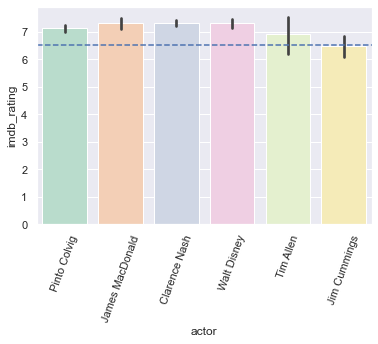

In [68]:
sns.barplot(data = actor_top6, x='actor', y='imdb_rating', palette="Pastel2")
plt.xticks(rotation=70)
plt.axhline(6.494737, ls = '--')
plt.show()

## דיסני פלוס שומרים על קלאסיקות הקולנוע ושמים אותן בקידמת הבמה.
## השחקנים המובילים בדיסני פלוס הם המדובבים של של דמויות נוסטלגיות כמו דונאלד דאק, פו הדב, טייגר ואפילו וולט דיסני בדמותו של מיקי מאוס. 

<img src="images/R.jpg" width="300"/> <img src="images/1180w-600h-disney-legend-Clarence-Nash-1180x600.jpg" width="400"/> <img src="images/1_h_fa7YdhZ3gAOhhx5evwbQ.jpeg" width="200"/>